In [106]:
import sys
import os
import pathlib2
import csv
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
%matplotlib inline

In [44]:
home = pathlib2.Path.home()
full_path = home/"documents"/"stash"/"ps-metadata-analysis"/"data"/"patch_seq_log_mouse.csv"
full_path = str(full_path)
full_path
initial = pd.read_csv(full_path)

In [45]:
ps = initial[["Date", "Post patch?", "Post patch pipette R", "Resolution index", "Bad dates", "SM_QC_PF"]]
ps["Date"] = pd.to_datetime(ps["Date"], errors="coerce", format = '%y%m%d')
ps = ps[ps["Date"] >= '2017-10-02']
ps = ps[ps["Bad dates"] != 'x']
ps = ps[ps["SM_QC_PF"] != 'cnt']
ps = ps[(ps["Post patch?"] == 'nucleus_absent') | (ps['Post patch?'] == 'no_nucleus_visible')]
ps.dropna(subset = ["Post patch?", "Post patch pipette R", "Resolution index"], inplace = True)
ps = ps.drop("Bad dates", 1)
ps = ps.drop("SM_QC_PF", 1)
ps.head()

,Date,Post patch?,Post patch pipette R,Resolution index
4019,2017-10-02,nucleus_absent,10.0,0.132003
4022,2017-10-02,nucleus_absent,40.0,0.329975
4029,2017-10-02,nucleus_absent,30.0,0.703208
4032,2017-10-02,nucleus_absent,1000.0,0.329975
4034,2017-10-02,nucleus_absent,4.7,0.132003


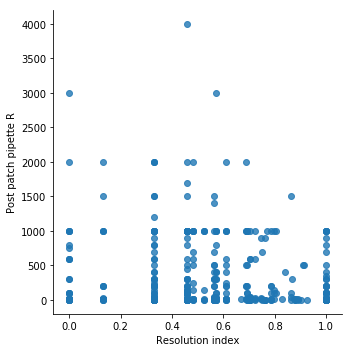

In [116]:
sns.lmplot(x = 'Resolution index', y = 'Post patch pipette R',
           data = ps, fit_reg = False)

In [93]:
full_path = home/"documents"/"stash"/"ps-metadata-analysis"/"data"/"cell_types_cell_report_card.csv"
report_card = pd.read_csv(full_path)

In [94]:
rcm = report_card[['cell_specimen_name', 'ims63x_go_no_go']]
psm = initial[['Date', 'File', 'Post patch?', 'Post patch pipette R', 'Bad dates', 'SM_QC_PF']]

In [95]:
psm["Date"] = pd.to_datetime(psm["Date"], errors="coerce", format = '%y%m%d')
psm = psm[psm["Date"] >= '2017-10-02']
psm = psm[psm["Bad dates"] != 'x']
psm = psm[psm["SM_QC_PF"] != 'cnt']
psm = psm[(psm["Post patch?"] == 'nucleus_absent') | (psm['Post patch?'] == 'no_nucleus_visible')]
psm.dropna(subset = ["Post patch?", "Post patch pipette R"], inplace = True)
psm = psm.drop("Bad dates", 1)
psm = psm.drop("SM_QC_PF", 1)
psm.tail()
#rcm.tail()
morph = pd.merge(left = psm, right = rcm, left_on = 'File', right_on = 'cell_specimen_name', how = 'left')

In [105]:
morph.dropna(subset = ["ims63x_go_no_go"], inplace = True)
morph.tail()

,Date,File,Post patch?,Post patch pipette R,cell_specimen_name,ims63x_go_no_go
405,2018-01-24,Htr3a-Cre_NO152;Ai14-368862.05.01.02,nucleus_absent,200.0,Htr3a-Cre_NO152;Ai14-368862.05.01.02,63x no go
414,2018-01-26,Vip-IRES-Cre;Ai14-370736.03.02.02,nucleus_absent,10.0,Vip-IRES-Cre;Ai14-370736.03.02.02,63x no go
415,2018-01-26,Htr3a-Cre_NO152;Ai14-368865.03.01.01,nucleus_absent,120.0,Htr3a-Cre_NO152;Ai14-368865.03.01.01,63x no go
418,2018-01-29,Sst-IRES-Cre;Ai14-372545.04.02.01,nucleus_absent,0.0,Sst-IRES-Cre;Ai14-372545.04.02.01,63x no go
431,2018-01-31,Sst-IRES-Cre;Ai14-372548.03.01.04,nucleus_absent,3.0,Sst-IRES-Cre;Ai14-372548.03.01.04,63x no go


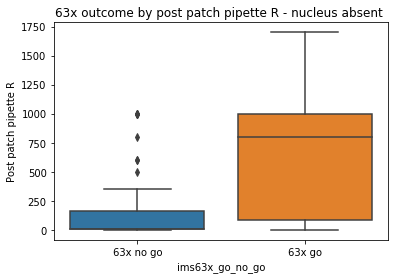

In [110]:
sns.set_context = ('poster') 
sns.boxplot(x = 'ims63x_go_no_go', y = 'Post patch pipette R',
            data = morph).set_title("Post patch pipette R by 63x outcome - nucleus absent ")